# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [7]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data["Gender"]=="Male"]
female_df = data.loc[data["Gender"]=="Female"]

male_df.describe()


,Height,Weight
count,5000.000000,5000.000000
mean,69.026346,187.020621
std,2.863362,19.781155
min,58.406905,112.902939
25%,67.174679,173.887767
50%,69.027709,187.033546
75%,70.988744,200.357802
max,78.998742,269.989699


In [6]:
female_df.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,63.708774,135.860093
std,2.696284,19.022468
min,54.263133,64.700127
25%,61.894441,122.934096
50%,63.730924,136.117583
75%,65.563565,148.810926
max,73.389586,202.237214


In [ ]:
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

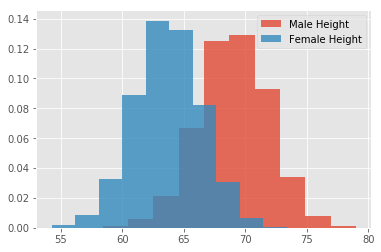

In [11]:
male_df.Height.hist(bins = 10, density = True, alpha = .8, label = "Male Height")
female_df.Height.hist(bins = 10, density = True, alpha = .8, label = "Female Height")
plt.legend()
plt.show()

# Record your observations - are these inline with your personal observations?

The average female height is lower than the average male height. The spread of Male heights is much larger and the area where there is the most oberlap is around 67 inches. 

#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

In [12]:
def density(x):
    n, bins = np.histogram(x, density = 1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
# np.random.seed(5)
# mu, sigma = 0, 0.1 # mean and standard deviation
# s = np.random.normal(mu, sigma, 100)
# x,y = density(s)
# plt.plot(x,y, label = 'test')
# plt.legend()

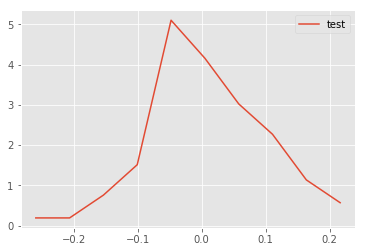

In [13]:
# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

In [ ]:
# You code here 

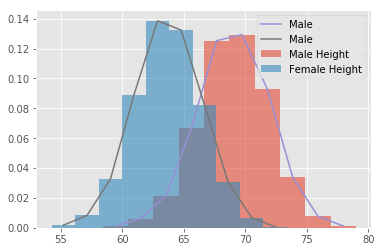

In [16]:
male_df.Height.hist(bins = 10, density = True, alpha = .6, label = "Male Height")
female_df.Height.hist(bins = 10, density = True, alpha = .6, label = "Female Height")

mx,my = density(male_df.Height)
plt.plot(mx,my, label = 'Male')

fx,fy = density(female_df.Height)
plt.plot(fx,fy, label = 'Male')


plt.legend()
plt.show()

#### Repeat above exerice for male and female weights

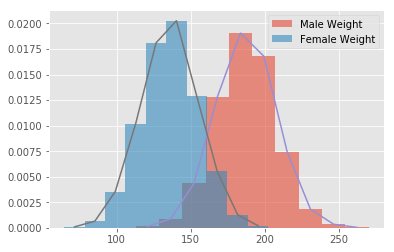

In [19]:
male_df.Weight.hist(bins = 10, density = True, alpha = .6, label = "Male Weight")
female_df.Weight.hist(bins = 10, density = True, alpha = .6, label = "Female Weight")

mx,my = density(male_df.Weight)
plt.plot(mx,my)

fx,fy = density(female_df.Weight)
plt.plot(fx,fy)


plt.legend()
plt.show()

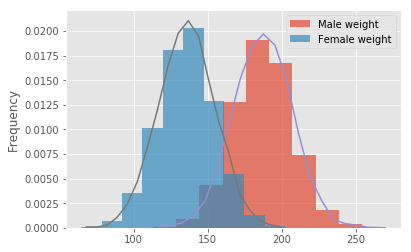

#### Write your observations in the cell below.

# Record your observations - are these inline with your personal observations?

Male and Female weights seem to have less overlap and males weigh more than females with a larger spread. The largest overlap between the genders in between 140 and 170. 

# So whats the takeaway when comparing male and female heights and weights 

In general, women seem to have smaller spreads between their heights and weights. Both distributions are normal with less overlap between the genders in weight. 


#### Repeat Above experiments in seaborn and compare with your results. 

/Users/miyakusumoto/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


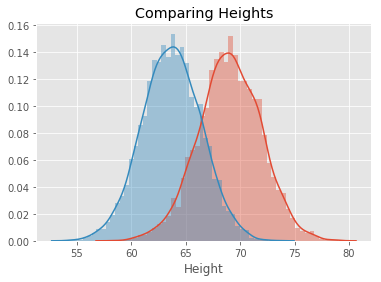

In [20]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

/Users/miyakusumoto/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


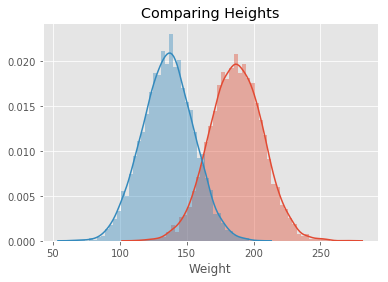

In [21]:
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing Heights')
plt.show()

In [22]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?
#The approaches are similar. They are different only in the initial look and feel and there are more bins in the seaborn table. 

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.